In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import VotingRegressor, StackingRegressor

# Models for training

In [3]:
from sklearn.linear_model import LinearRegression,Ridge ,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [4]:
# For train Test Split
from sklearn.model_selection import train_test_split


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Laptop Predictor/laptop_data.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [9]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [10]:
df['Company'].value_counts()

,count
Company,
Dell,297
Lenovo,297
HP,274
Asus,158
Acer,103
MSI,54
Toshiba,48
Apple,21
Samsung,9


In [11]:
df.describe()

,Inches,Ram,Weight,Price
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,59870.042910
std,1.426304,5.084665,0.665475,37243.201786
min,10.100000,2.000000,0.690000,9270.720000
25%,14.000000,4.000000,1.500000,31914.720000
50%,15.600000,8.000000,2.040000,52054.560000
75%,15.600000,8.000000,2.300000,79274.246400
max,18.400000,64.000000,4.700000,324954.720000


In [12]:
def priceToX_Comparison(col):
  sns.barplot(x=col,y='Price',data=df)
  plt.xticks(rotation='vertical')
  plt.show()

In [13]:
def XToY_Comparison(col1, col2):
  sns.barplot(x=col1,y=col2,data=df)
  plt.xticks(rotation='vertical')
  plt.show()

In [14]:
def value_counts(col):
  return df[col].value_counts()

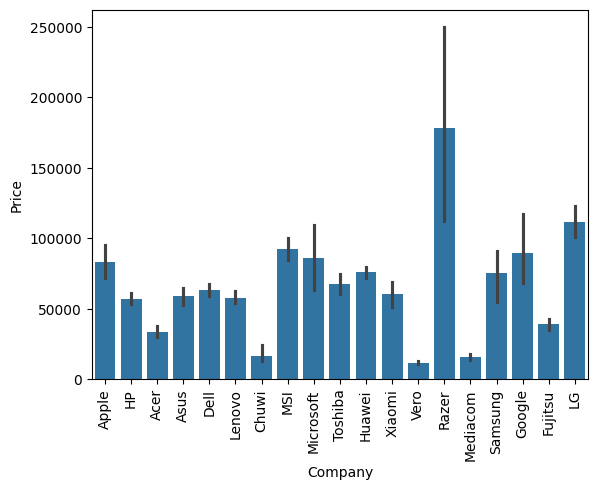

In [15]:
priceToX_Comparison('Company')

In [16]:
df['TypeName'].value_counts()

,count
TypeName,
Notebook,727
Gaming,205
Ultrabook,196
2 in 1 Convertible,121
Workstation,29
Netbook,25


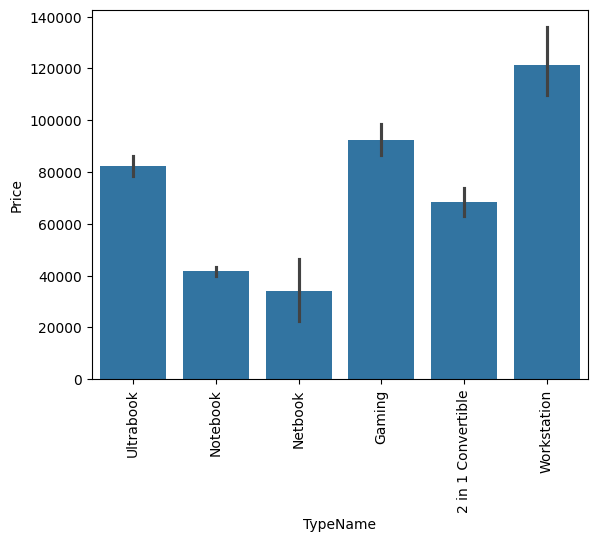

In [17]:
priceToX_Comparison('TypeName')

In [18]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [19]:
# Define Touchscreen for the laptops
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [20]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [21]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
404,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.80,119826.720,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.808,0,1
1076,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,4,1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.30,52054.560,0,1
187,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,No OS,2.40,41505.120,0,1
364,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,8,256GB SSD,Nvidia GeForce 920MX,No OS,2.20,26586.720,0,0
660,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.56,65481.120,0,0
1052,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.30,58288.320,1,1
277,Acer,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,1TB HDD,Nvidia GeForce MX130,Windows 10,2.20,39693.600,0,1
1088,HP,Notebook,13.3,Quad HD+ 3200x1800,Intel Pentium Dual Core 4405Y 1.5GHz,4,32GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.29,32767.200,0,0
129,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.50,49443.840,0,0


In [22]:
value_counts('Touchscreen')

,count
Touchscreen,
0,1111
1,192


In [23]:
df['IPS'].value_counts()

,count
IPS,
0,938
1,365


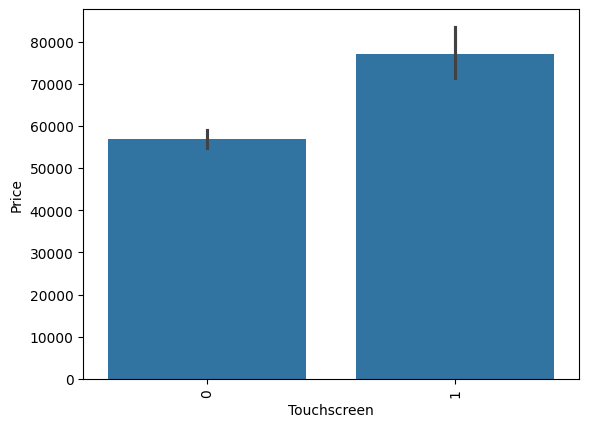

In [24]:
priceToX_Comparison('Touchscreen')

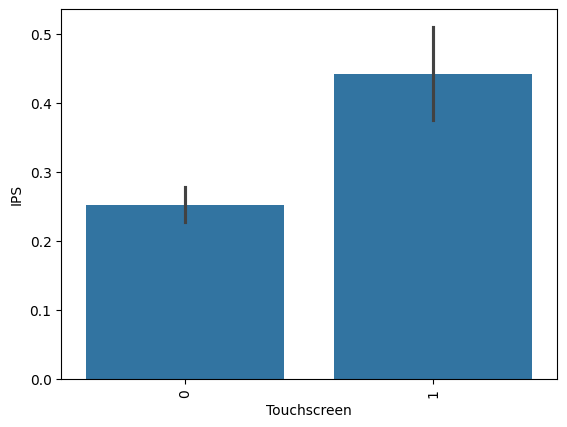

In [25]:
XToY_Comparison('Touchscreen','IPS')

In [26]:
screendf = df['ScreenResolution'].str.split('x',expand=True)

In [27]:
screendf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [28]:
len =screendf[0]

In [29]:
len = len.str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [30]:
width = screendf[1]

In [31]:
df['x_res'] = len

In [32]:
df['y_res'] = width

In [33]:
df['x_res'] = df['x_res'].astype('int32')
df['y_res'] = df['y_res'].astype('int32')

In [34]:
def CPUExtraction(value):
  df[value] = df['Cpu'].apply(lambda x:1 if value in x else 0)

In [35]:
df['pp1'] = (((df['x_res']**2) + (df['y_res']**2))**0.5/df['Inches']).astype('float')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
 15  pp1               1303 non-null   float64
dtypes: float32(1), float64(3), int32(3), int64

In [37]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

In [38]:
numeric_df.corr()['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Ram,0.743007
x_res,0.556529
y_res,0.552809
pp1,0.473487
IPS,0.252208
Weight,0.210370
Touchscreen,0.191226
Inches,0.068197


In [39]:
df.drop(columns=['ScreenResolution','Inches','x_res','y_res'],inplace=True)

In [40]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,pp1
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [41]:
df['CpuName'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [42]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,pp1,CpuName
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [43]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [44]:
df['Cpu brand'] = df['CpuName'].apply(fetch_processor)

In [45]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,pp1,CpuName,Cpu brand
268,HP,Notebook,Intel Core i7 8550U 1.8GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.50,54239.040,0,0,127.335675,Intel Core i7,Intel Core i7
92,HP,Notebook,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,1.49,63776.160,0,0,165.632118,Intel Core i7,Intel Core i7
547,Lenovo,Notebook,Intel Core i5 6200U 2.3GHz,4,1TB HDD,Intel HD Graphics 520,No OS,2.15,24634.008,0,0,141.211998,Intel Core i5,Intel Core i5
554,HP,Notebook,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.63,68198.400,0,0,127.335675,Intel Core i7,Intel Core i7
1198,Acer,Notebook,Intel Celeron Dual Core N3350 2GHz,4,1TB HDD,Intel HD Graphics 500,Linux,2.10,14492.160,0,0,100.454670,Intel Celeron Dual,Other Intel Processor


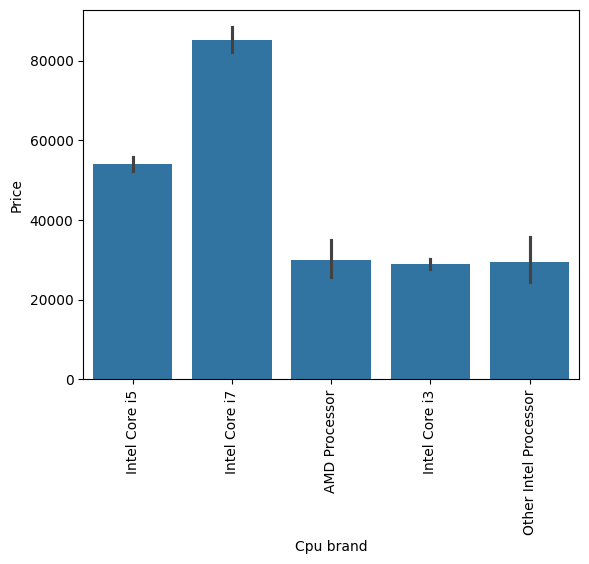

In [46]:
priceToX_Comparison('Cpu brand')

In [47]:
df.drop(columns=['Cpu','CpuName'],inplace=True)

In [48]:
numeric_df.corr()['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Ram,0.743007
x_res,0.556529
y_res,0.552809
pp1,0.473487
IPS,0.252208
Weight,0.210370
Touchscreen,0.191226
Inches,0.068197


In [49]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [50]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [51]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '', regex=True).astype(int)

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)


df['second'] = df['second'].str.replace(r'\D', '', regex=True).astype(int)

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

<ipython-input-51-c858a3add4dd>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["second"].fillna("0", inplace = True)


In [52]:
memorydf = df['Memory'].str.split('x',expand=True)

In [53]:
memorydf.iloc[165,:]

,165
0,256 SSD + 1000 HDD


In [54]:
df.drop(columns=['Memory','Flash_Storage', 'Hybrid'],inplace=True)

In [55]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,pp1,Cpu brand,HDD,SSD
555,Asus,Notebook,4,Intel HD Graphics 500,Linux,2.00,11934.72,0,0,100.454670,Other Intel Processor,500,0
829,Acer,Notebook,8,Intel HD Graphics 620,Windows 10,1.50,32980.32,0,1,157.350512,Intel Core i3,0,128
908,Lenovo,Notebook,8,Nvidia GeForce GTX 960M,Windows 10,2.60,42037.92,0,1,141.211998,Intel Core i5,1000,128
383,Lenovo,Notebook,8,Nvidia GeForce 940MX,Windows 10,1.50,58554.72,0,1,157.350512,Intel Core i5,0,256
698,Toshiba,Ultrabook,16,Intel HD Graphics 520,Windows 10,1.36,100006.56,1,0,165.632118,Intel Core i7,0,512


In [56]:
df['Gpu Brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [57]:
df = df[df['Gpu Brand'] != 'ARM']

In [58]:
df.drop(columns=['Gpu'],inplace=True)

<ipython-input-58-6552775d328b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'],inplace=True)


In [59]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [60]:
df['os'] = df['OpSys'].apply(cat_os)

<ipython-input-60-38671a3c07bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df['OpSys'].apply(cat_os)


In [61]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,pp1,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [62]:
value_counts('os')

,count
os,
Windows,1125
Others/No OS/Linux,156
Mac,21


In [63]:
df.to_csv('Cleaned_data.csv',index=False)

In [64]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,pp1,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [65]:
value_counts('os')

,count
os,
Windows,1125
Others/No OS/Linux,156
Mac,21


In [66]:
df.drop(columns=['OpSys'],inplace=True)

In [67]:
x = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [68]:
print(x)
print(y)

     Company            TypeName  Ram  Weight  Touchscreen  IPS         pp1  \
0      Apple           Ultrabook    8    1.37            0    1  226.983005   
1      Apple           Ultrabook    8    1.34            0    0  127.677940   
2         HP            Notebook    8    1.86            0    0  141.211998   
3      Apple           Ultrabook   16    1.83            0    1  220.534624   
4      Apple           Ultrabook    8    1.37            0    1  226.983005   
...      ...                 ...  ...     ...          ...  ...         ...   
1298  Lenovo  2 in 1 Convertible    4    1.80            1    1  157.350512   
1299  Lenovo  2 in 1 Convertible   16    1.30            1    1  276.053530   
1300  Lenovo            Notebook    2    1.50            0    0  111.935204   
1301      HP            Notebook    6    2.19            0    0  100.454670   
1302    Asus            Notebook    4    2.20            0    0  100.454670   

                  Cpu brand   HDD  SSD Gpu Brand   

## Train Test Split

In [69]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.15, random_state=2)

In [70]:
print(x.shape, xtrain.shape, xtest.shape)

(1302, 12) (1106, 12) (196, 12)


In [71]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')




# With Params

In [72]:
linModel = LinearRegression()
ridgeModel = Ridge(alpha=10)
lassoModel = Lasso(alpha=0.001)
knnModel = KNeighborsRegressor(n_neighbors=3)
dtModel = DecisionTreeRegressor(max_depth=8)
rfModel = RandomForestRegressor(n_estimators=100,
                                random_state=3,
                                max_samples=0.5,
                                max_features=0.75,
                                max_depth=15)
svm = SVR(kernel='rbf',C=1000,epsilon=0.1)
extra = ExtraTreesRegressor(n_estimators=100,
                            random_state=3,
                            max_features=0.75,
                            max_depth=15)
grad = GradientBoostingRegressor(n_estimators=500)
ada = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
xgb = XGBRegressor(n_estimators=45, max_depth=5, learning_rate=0.5)

# Without Params

In [73]:
linModelNP = LinearRegression()
ridgeModelNP = Ridge()
lassoModelNP = Lasso()
knnModelNP = KNeighborsRegressor()
dtModelNP = DecisionTreeRegressor()
rfModelNP = RandomForestRegressor()
#
svmNP = SVR()
extraNP = ExtraTreesRegressor()
gradNP = GradientBoostingRegressor()
adaNP = AdaBoostRegressor()
xgbNP = XGBRegressor()

# With Params

In [74]:
linModel = LinearRegression()
ridgeModel = Ridge(alpha=10)
lassoModel = Lasso(alpha=0.001)
knnModel = KNeighborsRegressor(n_neighbors=3)
dtModel = DecisionTreeRegressor(max_depth=8)
rfModel = RandomForestRegressor(n_estimators=100,
                                random_state=3,
                                max_samples=0.5,
                                max_features=0.75,
                                max_depth=15)
svm = SVR(kernel='rbf',C=1000,epsilon=0.1)
extra = ExtraTreesRegressor(n_estimators=100,
                            random_state=3,
                            max_features=0.75,
                            max_depth=15)
grad = GradientBoostingRegressor(n_estimators=500)
ada = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
xgb = XGBRegressor(n_estimators=45, max_depth=5, learning_rate=0.5)

### Voting Regressor

In [75]:
rf = RandomForestRegressor(n_estimators=290,
                                random_state=3,
                                max_samples=0.85,
                                max_features=0.35,
                                max_depth=30)
gbr = GradientBoostingRegressor(n_estimators=100)
xgbr = XGBRegressor(n_estimators=25, max_depth=5, learning_rate=0.5)
et = ExtraTreesRegressor(n_estimators=290, random_state=3, max_features=0.35, max_depth=30)

voteReg = VotingRegressor([('rf',rf),('gbr',gbr),('xgbr',xgbr),('et',et)], weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('model',voteReg)
])

pipe.fit(xtrain, ytrain)

testPred = pipe.predict(xtest)

r2Score = r2_score(ytest, testPred)
mea = mean_absolute_error(ytest, testPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.9015772736940197
MAE:  0.14973480632538758


# Linear Regression Model

In [76]:
pipe = Pipeline([
    ('step1',step1),
    ('model',linModel)
])


In [77]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('model', LinearRegression())])

In [78]:
trainPred = pipe.predict(xtrain)

r2Score = r2_score(ytrain, trainPred)
mea = mean_absolute_error(ytrain, trainPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.8339749577750897
MAE:  0.19854244045968664


In [79]:
testPred = pipe.predict(xtest)

r2Score = r2_score(ytest, testPred)
mea = mean_absolute_error(ytest, testPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.807327744841864
MAE:  0.21017827976428802


# Ridge

In [80]:
pipe = Pipeline([
    ('step1',step1),
    ('model',ridgeModel)
])


In [81]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('model', Ridge(alpha=10))])

In [82]:
trainPred = pipe.predict(xtrain)

r2Score = r2_score(ytrain, trainPred)
mea = mean_absolute_error(ytrain, trainPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.824391425956891
MAE:  0.2045078715335134


In [83]:
testPred = pipe.predict(xtest)

r2Score = r2_score(ytest, testPred)
mea = mean_absolute_error(ytest, testPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.8127331031311809
MAE:  0.20926802242582968


# Lasso Model

In [84]:
pipe = Pipeline([
    ('step1',step1),
    ('model',lassoModel)
])


In [85]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('model', Lasso(alpha=0.001))])

In [86]:
trainPred = pipe.predict(xtrain)

r2Score = r2_score(ytrain, trainPred)
mea = mean_absolute_error(ytrain, trainPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.8250977562222127
MAE:  0.20484165298493853


In [87]:
testPred = pipe.predict(xtest)

r2Score = r2_score(ytest, testPred)
mea = mean_absolute_error(ytest, testPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.8071853945317105
MAE:  0.21114361613472565


# KNN

In [88]:
pipe = Pipeline([
    ('step1',step1),
    ('model',knnModel)
])


In [89]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('model', KNeighborsRegressor(n_neighbors=3))])

In [90]:
trainPred = pipe.predict(xtrain)

r2Score = r2_score(ytrain, trainPred)
mea = mean_absolute_error(ytrain, trainPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.9001440734460029
MAE:  0.14244056235883779


In [91]:
testPred = pipe.predict(xtest)

r2Score = r2_score(ytest, testPred)
mea = mean_absolute_error(ytest, testPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.8017673664034364
MAE:  0.19346118183798544


# DecisionTreeRegressor

In [92]:
pipe = Pipeline([
    ('step1',step1),
    ('model',dtModel)
])


In [93]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('model', DecisionTreeRegressor(max_depth=8))])

In [94]:
trainPred = pipe.predict(xtrain)

r2Score = r2_score(ytrain, trainPred)
mea = mean_absolute_error(ytrain, trainPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.9156717113482635
MAE:  0.13245585717524308


In [95]:
testPred = pipe.predict(xtest)

r2Score = r2_score(ytest, testPred)
mea = mean_absolute_error(ytest, testPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.8443321326583217
MAE:  0.17990952572223842


# Random Forest

In [96]:
pipe = Pipeline([
    ('step1',step1),
    ('model',rfModel)
])


In [97]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('model',
                 RandomForestRegressor(max_depth=15, max_features=0.75,
                                       max_samples=0.5, random_state=3))])

In [98]:
trainPred = pipe.predict(xtrain)

r2Score = r2_score(ytrain, trainPred)
mea = mean_absolute_error(ytrain, trainPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.9522213146831027
MAE:  0.10415082459764818


In [99]:
testPred = pipe.predict(xtest)

r2Score = r2_score(ytest, testPred)
mea = mean_absolute_error(ytest, testPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.8873402378382488
MAE:  0.15860130110457718


# SVM

In [100]:
pipe = Pipeline([
    ('step1',step1),
    ('model',svm)
])


In [101]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('model', SVR(C=1000))])

In [102]:
trainPred = pipe.predict(xtrain)

r2Score = r2_score(ytrain, trainPred)
mea = mean_absolute_error(ytrain, trainPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.8182539693546684
MAE:  0.20463936011361908


In [103]:
testPred = pipe.predict(xtest)

r2Score = r2_score(ytest, testPred)
mea = mean_absolute_error(ytest, testPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.7692320622365036
MAE:  0.2326813415243226


# Extra Tree

In [104]:
pipe = Pipeline([
    ('step1',step1),
    ('model',extra)
])


In [105]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('model',
                 ExtraTreesRegressor(max_depth=15, max_features=0.75,
                                     random_state=3))])

In [106]:
trainPred = pipe.predict(xtrain)

r2Score = r2_score(ytrain, trainPred)
mea = mean_absolute_error(ytrain, trainPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.9884769517664072
MAE:  0.03580154273487332


In [107]:
testPred = pipe.predict(xtest)

r2Score = r2_score(ytest, testPred)
mea = mean_absolute_error(ytest, testPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.8753793123440623
MAE:  0.15979519126758127


# Gradient Boosting

In [108]:
pipe = Pipeline([
    ('step1',step1),
    ('model',grad)
])


In [109]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('model', GradientBoostingRegressor(n_estimators=500))])

In [110]:
trainPred = pipe.predict(xtrain)

r2Score = r2_score(ytrain, trainPred)
mea = mean_absolute_error(ytrain, trainPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.9575447657623692
MAE:  0.09924466342161488


In [111]:
testPred = pipe.predict(xtest)

r2Score = r2_score(ytest, testPred)
mea = mean_absolute_error(ytest, testPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.8827858675589904
MAE:  0.15928016878593734


# Ada Boost

In [112]:
pipe = Pipeline([
    ('step1',step1),
    ('model',ada)
])


In [113]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('model', AdaBoostRegressor(n_estimators=15))])

In [114]:
trainPred = pipe.predict(xtrain)

r2Score = r2_score(ytrain, trainPred)
mea = mean_absolute_error(ytrain, trainPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.8099803605401175
MAE:  0.22240608478165513


In [115]:
testPred = pipe.predict(xtest)

r2Score = r2_score(ytest, testPred)
mea = mean_absolute_error(ytest, testPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.7987544067257848
MAE:  0.22953554696134976


# XG Boost

In [116]:
pipe = Pipeline([
    ('step1',step1),
    ('model',xgb)
])


In [117]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=F...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.5,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=45, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [118]:
trainPred = pipe.predict(xtrain)

r2Score = r2_score(ytrain, trainPred)
mea = mean_absolute_error(ytrain, trainPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.9733319571875036
MAE:  0.077581388616345


In [119]:
testPred = pipe.predict(xtest)

r2Score = r2_score(ytest, testPred)
mea = mean_absolute_error(ytest, testPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.8771404806375557
MAE:  0.16262936288951352


# With Parameter Execution

# SVM

In [120]:
pipe = Pipeline([
    ('step1',step1),
    ('model',svmNP)
])


In [121]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('model', SVR())])

In [122]:
trainPred = pipe.predict(xtrain)

r2Score = r2_score(ytrain, trainPred)
mea = mean_absolute_error(ytrain, trainPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.6161588985121722
MAE:  0.2993274363046015


In [123]:
testPred = pipe.predict(xtest)

r2Score = r2_score(ytest, testPred)
mea = mean_absolute_error(ytest, testPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.6110751844196869
MAE:  0.2958961989678176


# Extra Tree

In [124]:
pipe = Pipeline([
    ('step1',step1),
    ('model',extraNP)
])


In [125]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('model', ExtraTreesRegressor())])

In [126]:
trainPred = pipe.predict(xtrain)

r2Score = r2_score(ytrain, trainPred)
mea = mean_absolute_error(ytrain, trainPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.9961583612673353
MAE:  0.011108950381631195


In [127]:
testPred = pipe.predict(xtest)

r2Score = r2_score(ytest, testPred)
mea = mean_absolute_error(ytest, testPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.8697377793608296
MAE:  0.1594951339567675


# Gradient Boosting

In [128]:
pipe = Pipeline([
    ('step1',step1),
    ('model',gradNP)
])


In [129]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('model', GradientBoostingRegressor())])

In [130]:
trainPred = pipe.predict(xtrain)

r2Score = r2_score(ytrain, trainPred)
mea = mean_absolute_error(ytrain, trainPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.9044047400165711
MAE:  0.15119485162081392


In [131]:
testPred = pipe.predict(xtest)

r2Score = r2_score(ytest, testPred)
mea = mean_absolute_error(ytest, testPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.8671779026451815
MAE:  0.1754117859017633


# Ada Boost

In [132]:
pipe = Pipeline([
    ('step1',step1),
    ('model',adaNP)
])


In [133]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('model', AdaBoostRegressor())])

In [134]:
trainPred = pipe.predict(xtrain)

r2Score = r2_score(ytrain, trainPred)
mea = mean_absolute_error(ytrain, trainPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.815898697759272
MAE:  0.22350383144180358


In [135]:
testPred = pipe.predict(xtest)

r2Score = r2_score(ytest, testPred)
mea = mean_absolute_error(ytest, testPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.8005682255879509
MAE:  0.2251631766320852


# XG Boost

In [136]:
pipe = Pipeline([
    ('step1',step1),
    ('model',xgbNP)
])


In [137]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=F...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [138]:
trainPred = pipe.predict(xtrain)

r2Score = r2_score(ytrain, trainPred)
mea = mean_absolute_error(ytrain, trainPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.9875205331591724
MAE:  0.04927114838771372


In [139]:
testPred = pipe.predict(xtest)

r2Score = r2_score(ytest, testPred)
mea = mean_absolute_error(ytest, testPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

R2 Score:  0.8718090788557895
MAE:  0.15990560960401276


# Random Forest: Analysis

In [140]:
rfAna = RandomForestRegressor(n_estimators=290,
                                random_state=3,
                                max_samples=0.85,
                                max_features=0.35,
                                max_depth=30)

bestPipe = Pipeline([
    ('step1',step1),
    ('model',rfAna)
])

bestPipe.fit(xtrain, ytrain)


trainPred = bestPipe.predict(xtrain)

r2Score = r2_score(ytrain, trainPred)
mea = mean_absolute_error(ytrain, trainPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)

testPred = bestPipe.predict(xtest)

r2Score = r2_score(ytest, testPred)
mea = mean_absolute_error(ytest, testPred)
print(" Test -->   R2 Score: ", r2Score)
print(" Test -->   MAE: ", mea)

R2 Score:  0.9763358961330956
MAE:  0.07217309272713537
 Test -->   R2 Score:  0.9010763680352928
 Test -->   MAE:  0.15007291472810022


## Voting Reg

In [141]:
rf = RandomForestRegressor(n_estimators=290,
                                random_state=3,
                                max_samples=0.85,
                                max_features=0.35,
                                max_depth=30)
gbr = GradientBoostingRegressor(n_estimators=100)
xgbr = XGBRegressor(n_estimators=25, max_depth=5, learning_rate=0.5)
et = ExtraTreesRegressor(n_estimators=290, random_state=3, max_features=0.35, max_depth=30)

voteReg = VotingRegressor([('rf',rf),('gbr',gbr),('xgbr',xgbr),('et',et)], weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('model',voteReg)
])

pipe.fit(xtrain, ytrain)

testPred = pipe.predict(xtest)

r2Score = r2_score(ytest, testPred)
mea = mean_absolute_error(ytest, testPred)
print("R2 Score: ", r2Score)
print("MAE: ", mea)


R2 Score:  0.9015392196341204
MAE:  0.14976129241990283


# Export Df and best pipline

In [142]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,pp1,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [143]:
import pickle

pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(bestPipe, open('bestPipe.pkl', 'wb'))

In [144]:
x.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Touchscreen', 'IPS', 'pp1',
       'Cpu brand', 'HDD', 'SSD', 'Gpu Brand', 'os'],
      dtype='object')

In [145]:
df.sample(4)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,pp1,Cpu brand,HDD,SSD,Gpu Brand,os
639,Dell,Notebook,16,2.06,127818.72,1,0,282.423996,Intel Core i7,0,1000,Nvidia,Windows
745,Acer,Notebook,2,1.68,17582.40,0,0,111.935204,Other Intel Processor,0,0,Intel,Others/No OS/Linux
408,Lenovo,Notebook,4,2.20,21791.52,0,0,141.211998,Intel Core i3,500,0,Intel,Windows
963,Toshiba,Ultrabook,8,1.10,95371.20,1,0,176.232574,Intel Core i7,0,512,Intel,Windows


In [146]:
input = ['Dell', 'Notebook', 8,2.34,0,0,141.211998,'Intel Core i5',0,256,'Intel','Windows']
input = np.array(input).reshape(1,12)
np.exp(bestPipe.predict(input))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([50189.65265763])

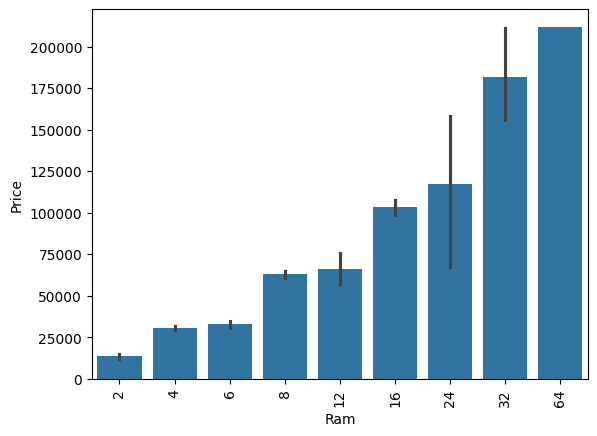

In [150]:
priceToX_Comparison('Ram')